# Лабораторная работа №2

## Задание №1

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate


### Глобальные функции

In [39]:
A = 2.0
F1 = 50
F2 = 150
N0 = 1000
START = 0.0
END = 1.0

### Графики косинусов с частотой 50 Гц и частотой 150 Гц

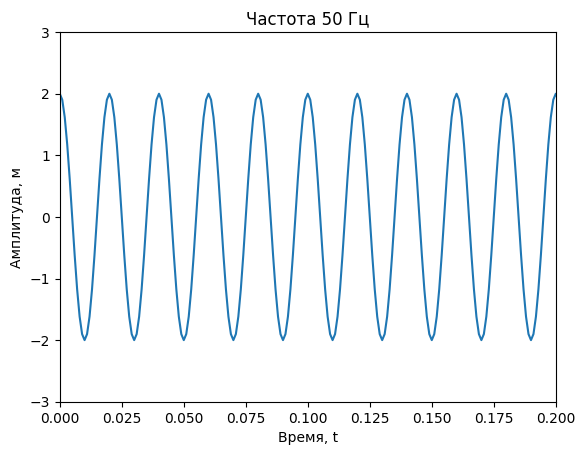

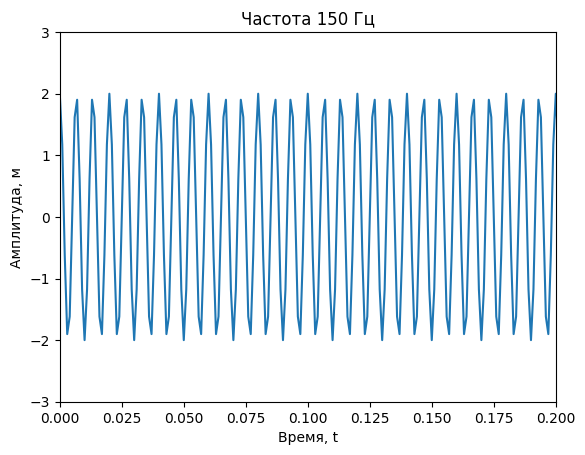

In [40]:
# Функция нахождения циклической частоты через частоту
def cyclic_frequency_(f):
    return 2 * np.pi * f

# Функция косинуса
def func_1(x, f, A):
    return A * np.cos(cyclic_frequency_(f) * x)

x1 = np.linspace(START, END, N0, endpoint = False)
y1 = np.array([func_1(t, F1, A) for t in x1 ])
x2 = np.linspace(START, END, N0, endpoint = False)
y2 = np.array([func_1(t, F2, A) for t in x2 ])

plt.ylim(-3, 3)
plt.xlim(0, 0.2)
plt.xlabel('Время, t')
plt.ylabel('Амплитуда, м')
plt.title('Частота 50 Гц')
plt.plot(x1, y1)
plt.show()

plt.ylim(-3, 3)
plt.xlim(0, 0.2)
plt.xlabel('Время, t')
plt.ylabel('Амплитуда, м')
plt.title('Частота 150 Гц')
plt.plot(x2, y2)
plt.show()

### Спектр функции

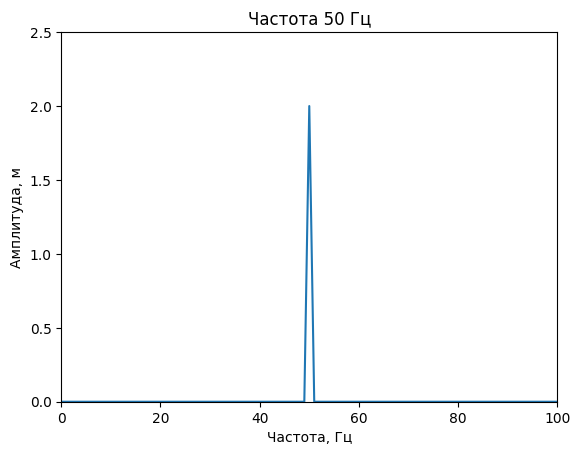

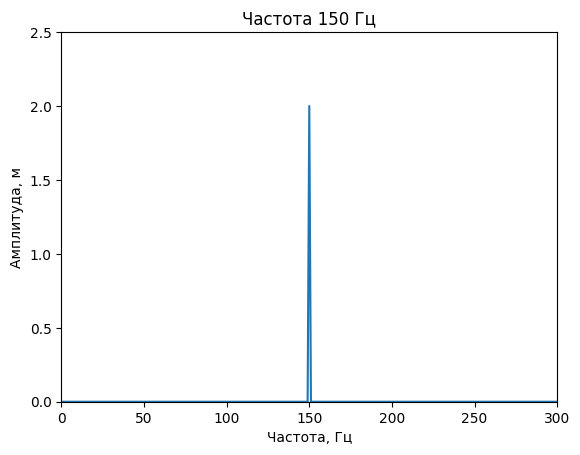

In [41]:
# Нахождение спектра сигнала
def spectrum(x, y) :
    xff = np.arange(len(x))
    # xff = xff[range(len(x) // 2)]
    yff = np.fft.fft(y) / len(x)
    # yff = yff[range(len(x) // 2)]
    return xff, yff 

xf1, yf1 = spectrum(x1, y1)
plt.ylim(0, 2.5)
plt.xlim(0, 100)
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда, м')
plt.title('Частота 50 Гц')
plt.plot(xf1, np.abs(A * yf1))
plt.show()

xf2, yf2 = spectrum(x2, y2)
plt.ylim(0, 2.5)
plt.xlim(0, 300)
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда, м')
plt.title('Частота 150 Гц')
plt.plot(xf2, np.abs(A * yf2))
plt.show()

### Спектр функций - DFT_slow

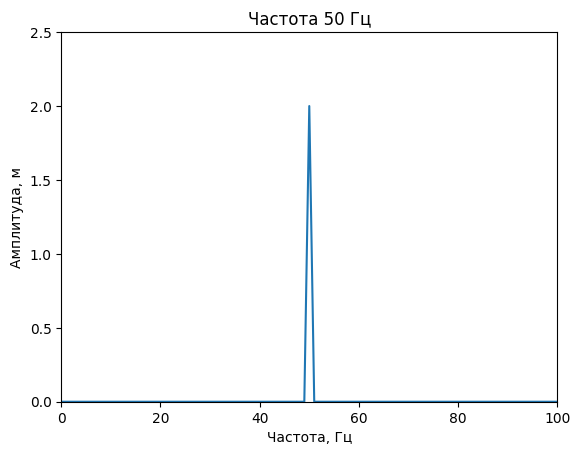

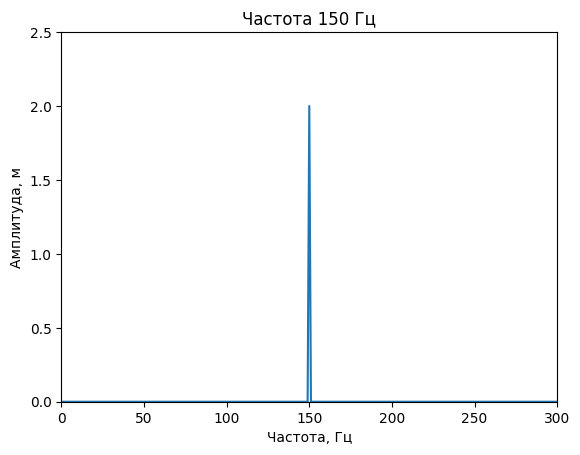

In [42]:
def DFT_slow(y):
    y =np.asarray(y, dtype=float)
    t = y.shape[0]
    n = np.arange(t)
    k = n.reshape((t, 1))
    M = np.exp(-2j * np.pi * k * n / t)
    yff = np.dot(M, y) / len(y)
    return yff

xf1 = np.arange(len(x1))
yf1 = DFT_slow(y1)
plt.ylim(0, 2.5)
plt.xlim(0, 100)
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда, м')
plt.title('Частота 50 Гц')
plt.plot(xf1, np.abs(A * yf1))
plt.show()


xf2 = np.arange(len(x2))
yf2 = DFT_slow(y2)
plt.ylim(0, 2.5)
plt.xlim(0, 300)
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда, м')
plt.title('Частота 150 Гц')
plt.plot(xf2, np.abs(A * yf2))
plt.show()

### Сравнение времени выполнения функций

In [43]:
%timeit DFT_slow(y1)
%timeit np.fft.fft(y1)

31.2 ms ± 2.27 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
6.11 µs ± 30.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


### Быстрое обратное преобразование

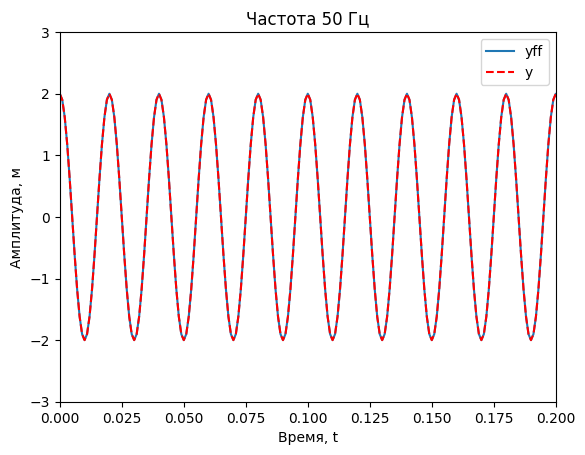

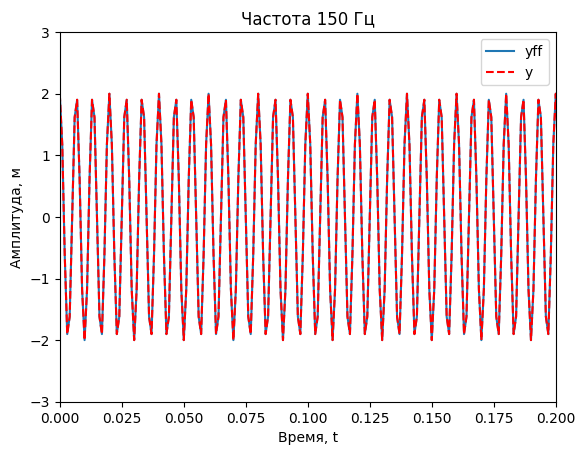

In [44]:
yff = np.fft.ifft(yf1 * len(x1))

plt.ylim(-3, 3)
plt.xlim(0, 0.2)
plt.xlabel('Время, t')
plt.ylabel('Амплитуда, м')
plt.title('Частота 50 Гц')
plt.plot(x1, yff)
plt.plot(x1, y1, 'r--')
plt.legend(['yff','y'])
plt.show()

yff = np.fft.ifft(yf2 * len(x2))
plt.ylim(-3, 3)
plt.xlim(0, 0.2)
plt.xlabel('Время, t')
plt.ylabel('Амплитуда, м')
plt.title('Частота 150 Гц')
plt.plot(x2, yff)
plt.plot(x2, y2,'r--')
plt.legend(['yff','y'])
plt.show()

### Дискретный спектр зашумленного сигнала

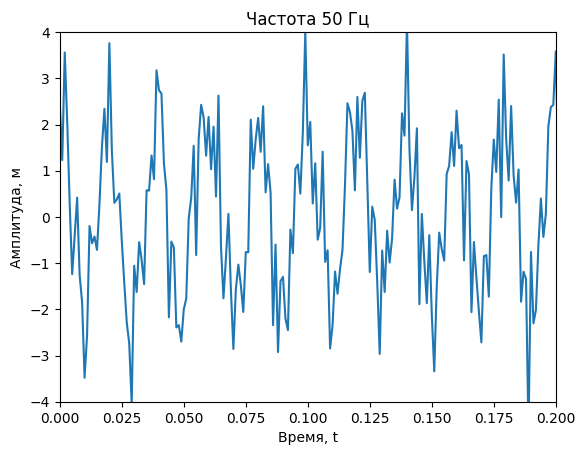

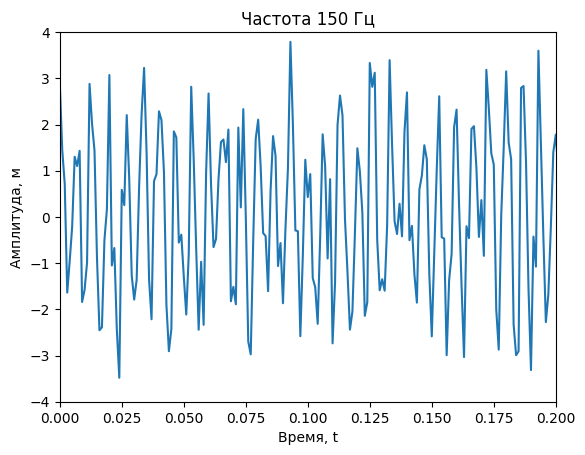

In [45]:
y1 += np.random.normal(0, 1, x1.shape)
y2 += np.random.normal(0, 1, x2.shape)

plt.ylim(-4, 4)
plt.xlim(0, 0.2)
plt.xlabel('Время, t')
plt.ylabel('Амплитуда, м')
plt.title('Частота 50 Гц')
plt.plot(x1, y1)
plt.show()

plt.ylim(-4, 4)
plt.xlim(0, 0.2)
plt.xlabel('Время, t')
plt.ylabel('Амплитуда, м')
plt.title('Частота 150 Гц')
plt.plot(x2, y2)
plt.show()

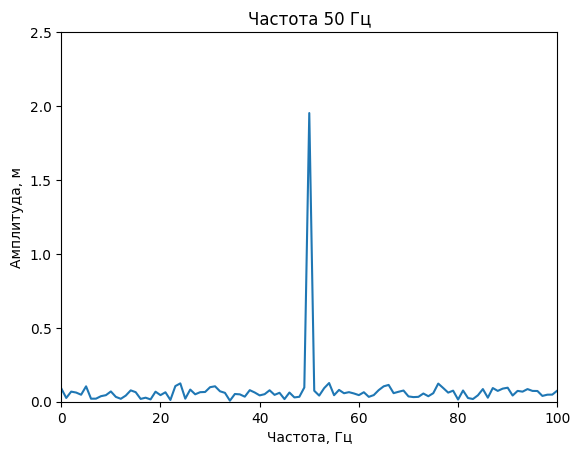

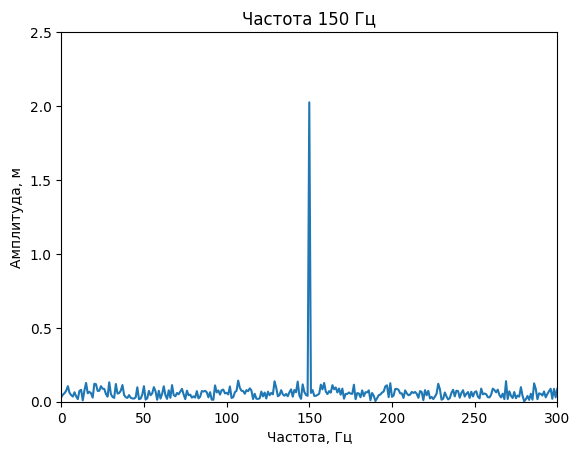

In [46]:
xf1, yf1 = spectrum(x1, y1)
xf2, yf2 = spectrum(x2, y2)

plt.ylim(0, 2.5)
plt.xlim(0, 100)
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда, м')
plt.title('Частота 50 Гц')
plt.plot(xf1, np.abs(A * yf1))
plt.show()

plt.ylim(0, 2.5)
plt.xlim(0, 300)
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда, м')
plt.title('Частота 150 Гц')
plt.plot(xf2, np.abs(A * yf2))
plt.show()

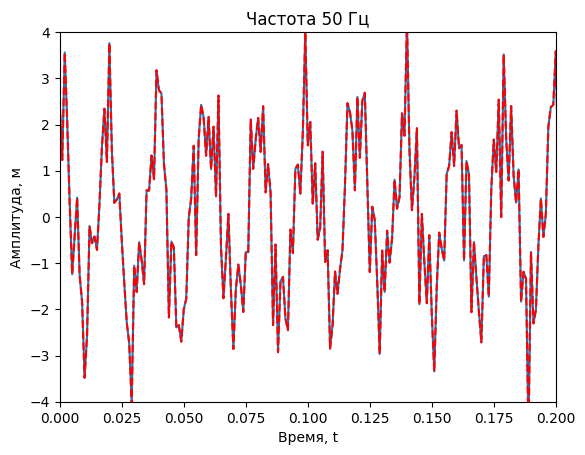

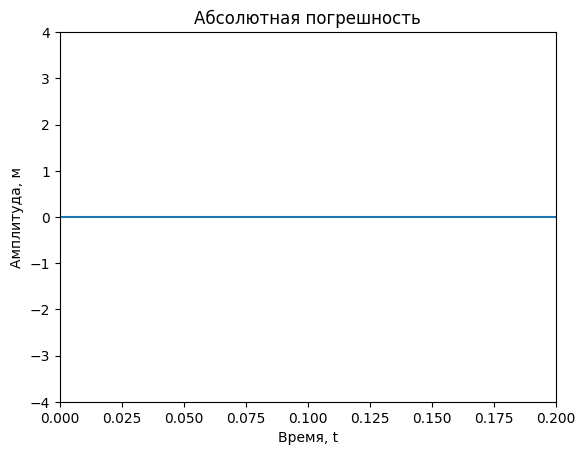

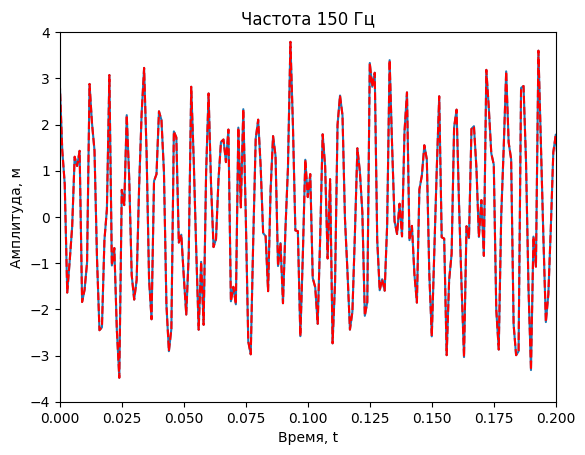

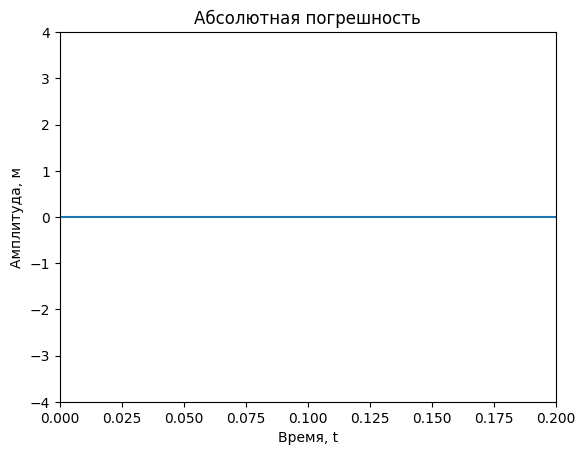

In [47]:
yff1 = np.fft.ifft(yf1 * len(x1))

plt.ylim(-4, 4)
plt.xlim(0, 0.2)
plt.xlabel('Время, t')
plt.ylabel('Амплитуда, м')
plt.title('Частота 50 Гц')
plt.plot(x1, yff1)
plt.plot(x1, y1, 'r--')
plt.show()

y = y1 - yff1
plt.ylim(-4, 4)
plt.xlim(0, 0.2)
plt.xlabel('Время, t')
plt.ylabel('Амплитуда, м')
plt.title('Абсолютная погрешность')
plt.plot(x1, y)
plt.show()

yff2 = np.fft.ifft(yf2 * len(x2))

plt.ylim(-4, 4)
plt.xlim(0, 0.2)
plt.xlabel('Время, t')
plt.ylabel('Амплитуда, м')
plt.title('Частота 150 Гц')
plt.plot(x2, yff2)
plt.plot(x2, y2, 'r--')
plt.show()

y = y2 - yff2
plt.ylim(-4, 4)
plt.xlim(0, 0.2)
plt.xlabel('Время, t')
plt.ylabel('Амплитуда, м')
plt.title('Абсолютная погрешность')
plt.plot(x2, y)
plt.show()

## Задание №2

### Глобальные переменные 

In [48]:
T = 2.0
A = 2.0
N0 = 1024
START = 0.0
END = 4.0

### Прямоугольный сигнал

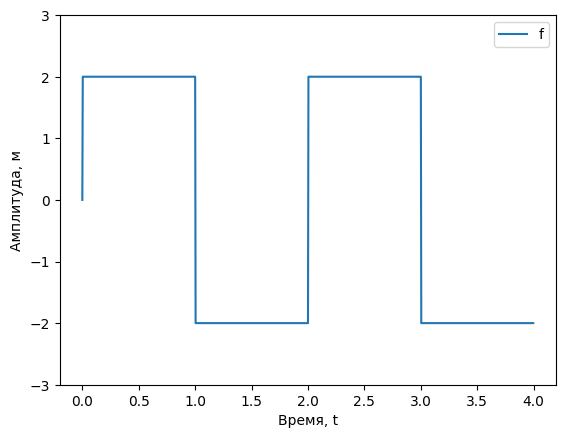

In [49]:
# Нахождение циклической частоты через период
def cyclic_frequency(T):
    return 2 * np.pi / T

# Функция прямоугольного сигнала
def func_1(x, T, A):
    y = A * np.sign(np.tan(np.pi * x / T))
    return y

x1 = np.linspace(START, END, N0, endpoint = False)
y1 = np.array([func_1(t, T, A) for t in x1])
plt.ylim(-3, 3)
plt.xlabel('Время, t')
plt.ylabel('Амплитуда, м')
plt.plot(x1, y1)
plt.legend('f(x)')

plt.show()

### Спектр прямоугольного сигнала

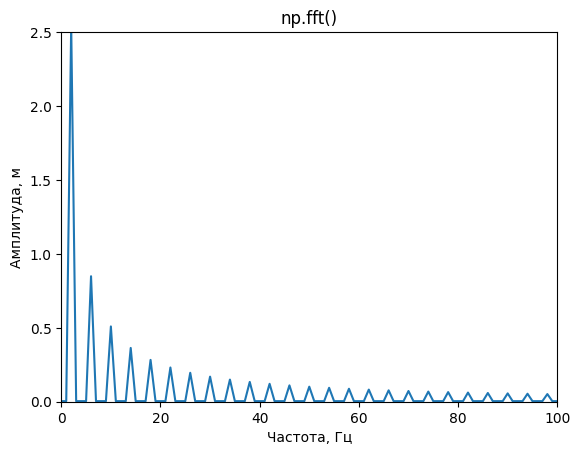

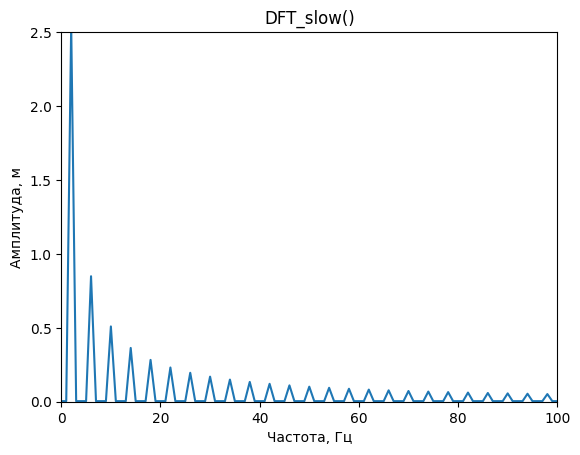

In [50]:
xf1, yf1 = spectrum(x1, y1)
plt.ylim(0, 2.5)
plt.xlim(0, 100)
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда, м')
plt.title('np.fft()')
plt.plot(xf1, np.abs(A * yf1))
plt.show()

xf2 = np.arange(len(x1))
yf2 = DFT_slow(y1)
plt.ylim(0, 2.5)
plt.xlim(0, 100)
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда, м')
plt.title('DFT_slow()')
plt.plot(xf2, np.abs(A * yf2))
plt.show()

### Спектр зашумленного прямоугольного сигнала

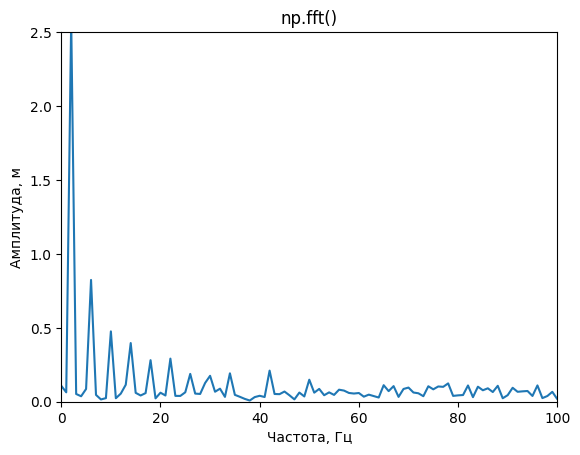

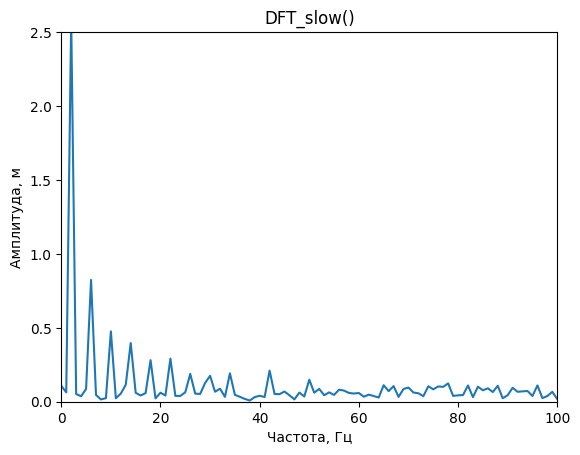

In [51]:
y2 = y1 + np.random.normal(0, 1, x1.shape)

xf1, yf1 = spectrum(x1, y2)
plt.ylim(0, 2.5)
plt.xlim(0, 100)
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда, м')
plt.title('np.fft()')
plt.plot(xf1, np.abs(A * yf1))
plt.show()

xf2 = np.arange(len(x1))
# xf1 = xf1[range(len(x1) // 2)]
yf2 = DFT_slow(y2)
plt.ylim(0, 2.5)
plt.xlim(0, 100)
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда, м')
plt.title('DFT_slow()')
plt.plot(xf2, np.abs(A * yf2))
plt.show()


## Задание №3

### Глобальные переменные

In [52]:
A = 2.0
F = 50
N0 = 1024
START = 0.0
END = 1.0

### Синусоидальный сигнал 

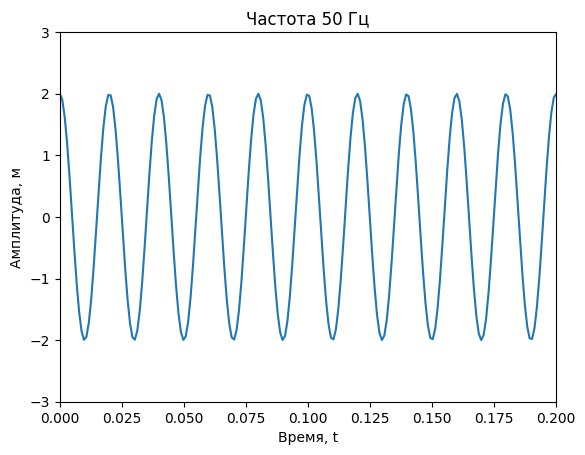

In [53]:
x = np.linspace(START, END, N0, endpoint = False)
y = A * np.cos(2 * np.pi * F * x)  
plt.ylim(-3, 3)
plt.xlim(0, 0.2)
plt.xlabel('Время, t')
plt.ylabel('Амплитуда, м')
plt.title('Частота 50 Гц')
plt.plot(x, y)
plt.show()

### Бытсрое дискретное преобразование Фурье

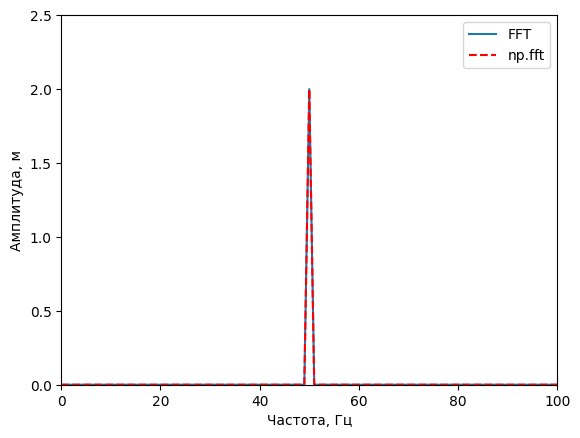

In [54]:
def FFT(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    if N <= 32:  
        return DFT_slow(x) * len(x)
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = np.exp(-2j * np.pi * np.arange(N) / N)
        return np.concatenate([X_even + factor[:N // 2] * X_odd,
                               X_even + factor[N // 2:] * X_odd])
xff = np.arange(len(x))
yf1 = FFT(y) / len(x)
yf2 = np.fft.fft(y) / len(x)
plt.ylim(0, 2.5)
plt.xlim(0, 100)
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда, м')
plt.plot(xff, np.abs(A * yf1))
plt.plot(xff, np.abs(A * yf2), 'r--')
plt.legend(['FFT','np.fft'])
plt.show()


### Сравнение скорости выполнения функций

In [55]:
%timeit FFT(y)
%timeit np.fft.fft(y)

962 µs ± 2.81 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
6.1 µs ± 13.7 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
